In [12]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
target = wine.target

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.data, target, test_size = 0.24, random_state=40)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#eval using cross val

LR = cross_val_score(LogisticRegression(max_iter=33), wine.data, wine.target, cv = 3)
DT = cross_val_score(DecisionTreeClassifier(random_state=40), wine.data, wine.target, cv = 3)
RF = cross_val_score(RandomForestClassifier(random_state=40), wine.data, wine.target, cv = 3)


/Users/tanmaie/Downloads/intern-bootcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tanmaie/Downloads/intern-bootcamp/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 3 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=3).
You might also want to scale the data as shown in:
    https://scikit-le

In [20]:
import numpy as np 

print(np.average(LR))
print(np.average(DT))
print(np.average(RF))

0.33145009416195853
0.87090395480226
0.9494350282485876


#Hyperparameter tune random forest

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators' : [100,200,500],
                'max_depth' : [None, 3, 5], 
                'min_samples_split': [2,5,10]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, scoring='accuracy',n_jobs=-1 )
g_fit = grid.fit(x_train, y_train)
g_fit

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 3, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [31]:
dir(grid)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_refit_for_multimetric',
 '_check_scorers_accept_sample_weight',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_html_repr',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_run_sea

In [32]:
grid.best_params_
grid.best_score_

np.float64(0.9851851851851852)

In [35]:
import joblib

best_model = grid.best_estimator_
joblib.dump(best_model, "/Users/tanmaie/Downloads/intern-bootcamp/06_ml/best_model.pkl")

['/Users/tanmaie/Downloads/intern-bootcamp/06_ml/best_model.pkl']

In [37]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 

y_pred = best_model.predict(x_test)


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        17

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



Text(50.722222222222214, 0.5, 'actual')

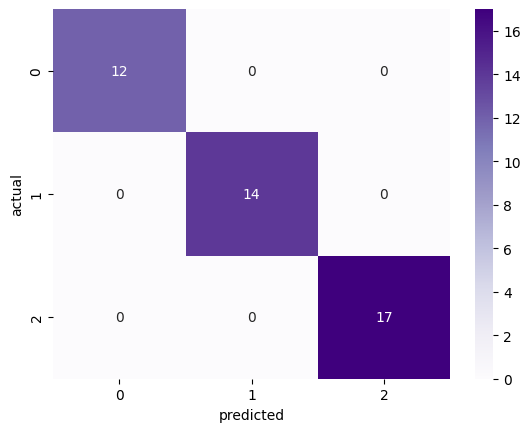

In [54]:
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Purples')
plt.xlabel('predicted')
plt.ylabel('actual')

feature importance

In [60]:
X = wine.data

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

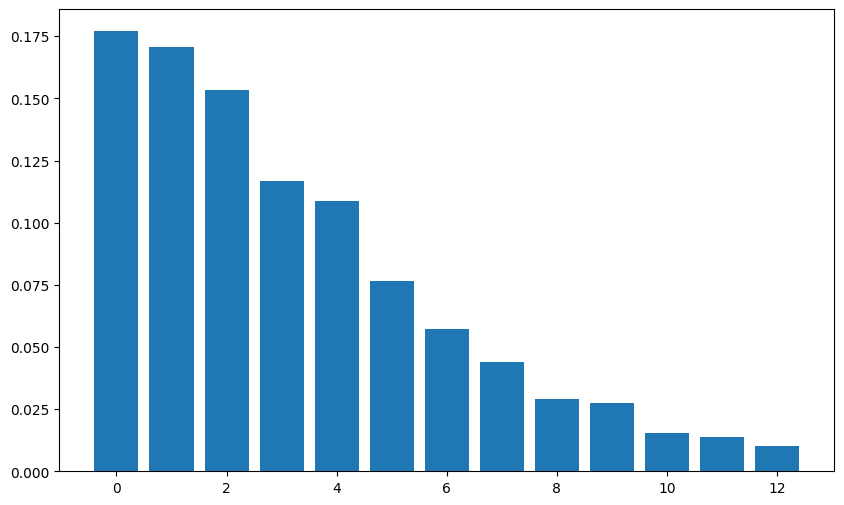

In [61]:
import numpy as np 
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()